In [1]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt

# plt.rcParams['figure.figsize'] = [20, 20]

from makeCorner import *

# az.rcParams["plot.max_subplots"] = 80
tmp_max = 100
tmp_min = 2.

In [2]:
def massModel_variation_all_m1(m1, alpha_ref, mu_m1, sig_m1,
                               log_f_peak, mMax, mMin, dmMax, dmMin):
    
    p_m1_pl = (1.+alpha_ref)*m1**(alpha_ref)/(tmp_max**(1.+alpha_ref) - tmp_min**(1.+alpha_ref))

    new_mu_m1 = mu_m1
    new_sig_m1 = sig_m1

    p_m1_peak = jnp.exp(-(m1-new_mu_m1)**2/(2.*new_sig_m1**2))/jnp.sqrt(2.*np.pi*new_sig_m1**2)

    # Compute low- and high-mass filters
    low_filter = jnp.exp(-(m1-mMin)**2/(2.*dmMin**2))
    low_filter = jnp.where(m1<mMin,low_filter,1.)
    high_filter = jnp.exp(-(m1-mMax)**2/(2.*dmMax**2))
    high_filter = jnp.where(m1>mMax,high_filter,1.)

    actual_f_peak = log_f_peak 
    # actual_f_peak = 10.**(new_f_peak)
    combined_p = jnp.array((actual_f_peak*p_m1_peak + (1. - actual_f_peak)*p_m1_pl)*low_filter*high_filter)
    return combined_p

def peak(m1, new_mu_m1, new_sig_m1, f_peak, low_filter, high_filter):
    return f_peak*(jnp.exp(-(m1-new_mu_m1)**2/(2.*new_sig_m1**2))/jnp.sqrt(2.*np.pi*new_sig_m1**2))*low_filter*high_filter

def power_law(m1,alpha_ref, f_peak, low_filter, high_filter):
    return (1. - f_peak)*((1.+alpha_ref)*m1**(alpha_ref)/(tmp_max**(1.+alpha_ref) - tmp_min**(1.+alpha_ref)))*low_filter*high_filter

In [3]:
m_grid = np.linspace(2, 120, 500)
alpha_ref = -4.
mu_m1 = 35.
sig_m1 = 4.
f_peak = 0.01
mMax = 100
mMin = 5
dmMax = 0.1
dmMin = 0.1

low_filter = jnp.exp(-(m_grid-mMin)**2/(2.*dmMin**2))
low_filter = jnp.where(m_grid<mMin,low_filter,1.)
high_filter = jnp.exp(-(m_grid-mMax)**2/(2.*dmMax**2))
high_filter = jnp.where(m_grid>mMax,high_filter,1.)

In [4]:
all_variation = massModel_variation_all_m1(m_grid, alpha_ref, mu_m1, sig_m1, 
                                           f_peak, mMax, mMin, dmMax, dmMin)

peak_grid = peak(m_grid, mu_m1, sig_m1, f_peak, low_filter, high_filter)
power_law_grid = power_law(m_grid, alpha_ref, f_peak, low_filter, high_filter)

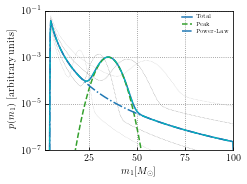

In [23]:
cm = 1/2.54
fig = plt.figure(figsize=(9*cm, 6.75*cm))
ais = [0.3, 0.6, 1, 0.6, 0.3]
plt.plot(m_grid, all_variation, label= "Total")
mus = [20., 30, 35, 45, 55]
sigs = [2, 3, 4, 5, 6]
plt.plot(m_grid, peak_grid, color = "#33a02c", label="Peak", linestyle='dashed')
plt.plot(m_grid, power_law(m_grid, alpha_ref, f_peak, low_filter, high_filter), color="#1f78b4", linestyle='dashdot', label = 'Power-Law')
alpha_refs = [-5, -4.5, -4, -3.5, -3]
for index, (alpha_re, mu, sigma) in enumerate(zip(alpha_refs, mus, sigs)):
    if alpha_re == -4:
        plt.plot(m_grid, massModel_variation_all_m1(
            m_grid,
            alpha_re,
            mu,
            sigma,
            f_peak,
            mMax,
            mMin,
            dmMax,
            dmMin,
        ), "c", linestyle='dashdot', alpha = ais[index], linewidth = 1)
    else:
        plt.plot(m_grid, massModel_variation_all_m1(
            m_grid,
            alpha_re,
            mu,
            sigma,
            f_peak,
            mMax,
            mMin,
            dmMax,
            dmMin,
        ), color = "black", ls=':', alpha = ais[index], zorder=-1, linewidth= 0.5)
    # plt.plot(m_grid, massModel_variation_all_m1(m_grid, alpha_re, mu, sigma, f_peak, mMax, mMin, dmMax, dmMin),color='black',ls=':',zorder=-1,lw=1.5,alpha=ais[index]/2)
plt.xlabel(r"$m_1 [M_\odot]$", fontsize = 10)
plt.ylabel(r"$p(m_1)$ [arbitrary units]", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.xlim(2, 100)
plt.ylim(1e-7, 1e-1)
plt.legend(fontsize=5)
plt.tight_layout()
plt.savefig("cartoon_example_all.pdf", dpi = 400)
plt.show()

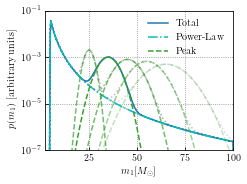

In [7]:
cm = 1/2.54
fig = plt.figure(figsize=(9*cm, 6.75*cm))
ais = [0.7, 1, 0.7, 0.5, 0.3]
plt.plot(m_grid, all_variation, label= "Total")
plt.plot(m_grid, power_law(m_grid, alpha_ref, f_peak, low_filter, high_filter), "c", linestyle='dashdot', label = 'Power-Law')
mus = [25., 35, 45, 55, 65]
sigs = [2, 4, 5, 6, 8]
for index, (mu, sig) in enumerate(zip(mus, sigs)):
    if mu == 35:
        plt.plot(m_grid, peak(m_grid, mu, sig, f_peak, low_filter, high_filter),  color = "#33a02c", label="Peak", linestyle='dashed', alpha = ais[index])
    else:
        plt.plot(m_grid, peak(m_grid, mu, sig, f_peak, low_filter, high_filter),  color = "#33a02c", linestyle='dashed', alpha = ais[index])
    plt.plot(m_grid,massModel_variation_all_m1(m_grid, alpha_ref, mu, sig, f_peak, mMax, mMin, dmMax, dmMin),color='black',ls=':',zorder=-1,lw=1.5,alpha=ais[index]/2)
plt.xlabel(r"$m_1 [M_\odot]$", fontsize = 10)
plt.ylabel(r"$p(m_1)$ [arbitrary units]", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.xlim(2, 100)
plt.ylim(1e-7, 1e-1)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("cartoon_example_peak.pdf", dpi = 400)
plt.show()

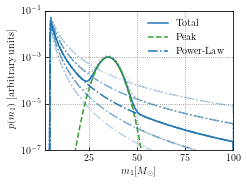

In [6]:
cm = 1/2.54
fig = plt.figure(figsize=(9*cm, 6.75*cm))
ais = [0.3, 0.6, 1, 0.6, 0.3]
plt.plot(m_grid, all_variation, label= "Total")
plt.plot(m_grid, peak(m_grid, mu_m1, sig_m1, f_peak, low_filter, high_filter),  color = "#33a02c", label="Peak", linestyle='dashed')
alpha_refs = [-5, -4.5, -4, -3.5, -3]
for index, alpha in enumerate(alpha_refs):
    if alpha == -4:
        plt.plot(m_grid, power_law(m_grid, alpha, f_peak, low_filter, high_filter), color = "#1f78b4", linestyle='dashdot', label = 'Power-Law', alpha = ais[index])
    else:
        plt.plot(m_grid, power_law(m_grid, alpha, f_peak, low_filter, high_filter),  color = "#1f78b4", linestyle='dashdot', alpha = ais[index])
    plt.plot(m_grid,massModel_variation_all_m1(m_grid, alpha, mu_m1, sig_m1, f_peak, mMax, mMin, dmMax, dmMin),color='black',ls=':',zorder=-1,lw=1.5,alpha=ais[index]/2)
plt.xlabel(r"$m_1 [M_\odot]$", fontsize = 10)
plt.ylabel(r"$p(m_1)$ [arbitrary units]", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.xlim(2, 100)
plt.ylim(1e-7, 1e-1)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("cartoon_example_power-law.pdf", dpi = 400)
plt.show()

In [47]:
def merger_rate_z(z, alpha, beta, zp):
    return (1+z)**alpha/(1+((1+z)/(1+zp))**(alpha+beta))

def alpha_function(z, alpha):
    return (1+z)**alpha

def beta_function(z, beta, zp):
    return ((1+z)/(1+zp))**(-beta)

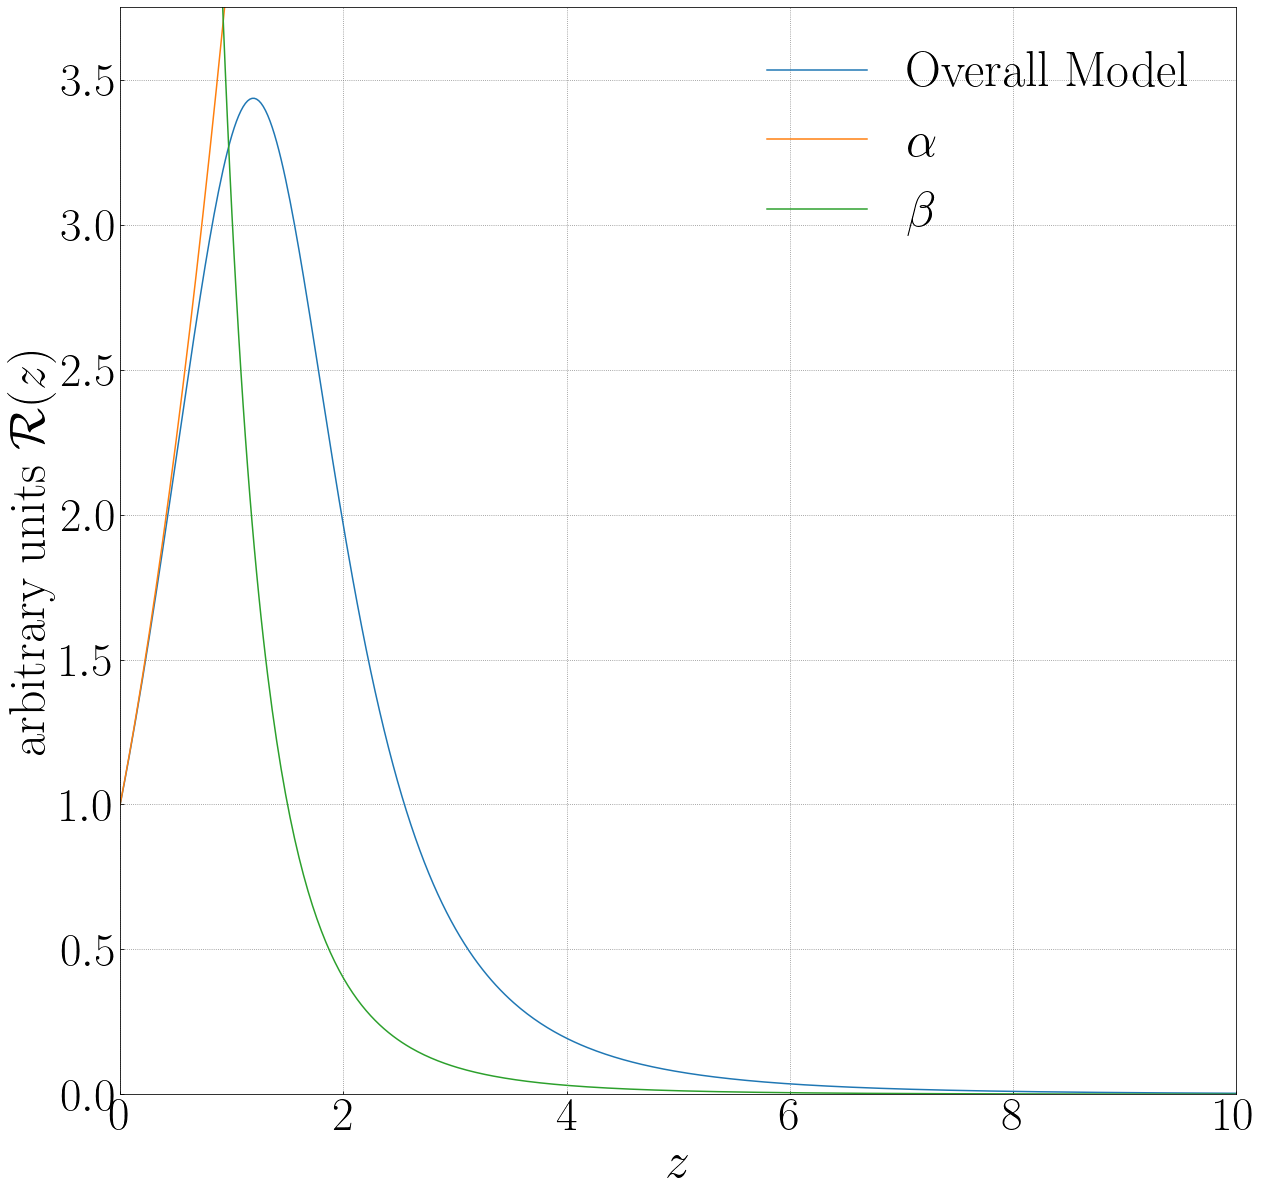

In [48]:
z_grid = np.linspace(0,10,500)
alpha = 2
beta = 5
zp = 1.5
plt.xticks(fontsize = 47)
plt.yticks(fontsize = 47)
plt.xlabel(r"$z$", fontsize = 50)
plt.ylabel(r"arbitrary units $\mathcal{R}(z)$", fontsize = 50)
plt.xlim(0,10)
plt.ylim(0, 3.75)
# plt.yscale("log")
plt.plot(z_grid, merger_rate_z(z_grid, alpha, beta, zp), label = "Overall Model")
plt.plot(z_grid, alpha_function(z_grid, alpha), label = r"$\alpha$")
plt.plot(z_grid, beta_function(z_grid, beta, zp), label = r"$\beta$")
plt.legend(fontsize = 50)
plt.show()